# Agent-based modelling
## Schelling's model in Social Networks
### Authors: K. Zakharov, D. Sobolev

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interactive
import numpy as np
import random
from random import uniform
from math import sqrt
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

### Класс модели

In [13]:
np.random.seed(10)
transitions = []
information_types = ["Politics", "Economy", "Sport", "Art", "Science", "Education", "Cooking"]
special_points = [(round(uniform(0, 1),4), round(uniform(0, 1),4)) for i in range(10000)]
special_points2 = [(round(uniform(0, 1),4), round(uniform(0, 1),4)) for i in range(100000)]


def f(x):
    if x:
        friendly_p.disabled = False
        friendly_p.value = 0.75
    else:
        friendly_p.disabled = True
        friendly_p.value = 0

class Agent:

    def __init__(self, a_type, tolerance_p, friendly, friendly_p):
        self.a_type = a_type
        self.change_location()
        self.wish = random.randint(0, 1)
        self.tol = round(uniform(0, 1), 2)
        self.fr = round(uniform(0, 1), 2)
        self.friendly = friendly
        self.popular = ''
        self.sociability = random.choice(["S","US"])
        self.preferences = random.choice(information_types)
        self.access_internet = random.choice([True, False])

    def change_location(self):
        self.location = round(uniform(0, 1),4), round(uniform(0, 1),4)

    def get_distance(self, other):
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)
    
    def inform(self, agents):
        if self.a_type == 1:
            self.popular = 'p'
        else:
            self.popular = 'up'
                
    def happy(self, agents):
        distances = []
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        distances.sort(key=lambda x: x[0])
        if self.popular == 'up':
            if self.sociability == 'S':
                neighbors = [agent for d, agent in distances[:local_neighbors.value + 4]]
                num_same_type = sum((agent.a_type == 1 and self.preferences == agent.preferences) for agent in neighbors)
                return num_same_type >= require_same_type.value
            else:
                neighbors3 = [agent for d, agent in distances[:local_neighbors.value]]
                num_same_type3 = sum((agent.a_type == 1 and self.preferences == agent.preferences) for agent in neighbors3)
                return num_same_type3 >= require_same_type.value
        else:
            neighbors2 = [agent for d, agent in distances[:local_neighbors.value + 8]]
            num_same_type2 = sum((agent.a_type == 1 and self.preferences == agent.preferences) for agent in neighbors2)
            return num_same_type2 >= require_same_type.value
        
    def update(self, agents):
        t2 = False
        
        for i in special_points:
            if self.location == i:
                self.a_type = 1
        for i in special_points2:        
            if self.location == i:
                t2 = True
        count = 0
        
        if t2 and self.friendly:
            self.tol += 0.10 
            self.fr += 0.10
        elif t2 and not self.friendly:
            self.tol += 0.10
        else:
            if self.friendly:
                if self.happy(agents) and self.a_type == 0:
                    if self.fr < friendly_p.value and self.wish == 0 and self.tol < tolerance_p.value:
                        return
                    elif self.fr < friendly_p.value and self.wish == 1 and self.tol < tolerance_p.value:
                        return
                    elif self.fr < friendly_p.value and self.wish == 0 and self.tol > tolerance_p.value:
                        return
                    elif self.fr < friendly_p.value and self.wish == 1 and self.access_internet and self.tol > tolerance_p.value:
                        self.a_type = 1
                        count += 1
                    elif self.fr < friendly_p.value and self.wish == 1 and not self.access_internet and self.tol > tolerance_p.value:
                        return    
                    elif self.fr > friendly_p.value and self.wish == 0 and self.access_internet and self.tol < tolerance_p.value:
                        return
                    elif self.fr > friendly_p.value and self.wish == 1 and self.access_internet and self.tol < tolerance_p.value:
                        self.a_type = 1
                        count += 1
                    elif self.fr > friendly_p.value and self.wish == 1 and not self.access_internet and self.tol < tolerance_p.value:
                        return  
                    elif self.fr > friendly_p.value and self.wish == 0 and self.tol > tolerance_p.value:
                        self.a_type = 1
                        count += 1
                    elif self.fr > friendly_p.value and self.wish == 1 and self.access_internet and self.tol > tolerance_p.value:
                        self.a_type = 1
                        count += 1
                    elif self.fr > friendly_p.value and self.wish == 1 and not self.access_internet and self.tol > tolerance_p.value:
                        return  
                    else:
                        return    
                elif self.happy(agents) and self.a_type == 1:
                    return

                elif not self.happy(agents) and self.a_type == 0:
                    if self.fr < friendly_p.value and self.wish == 0 and self.tol < tolerance_p.value:
                        return
                    elif self.fr < friendly_p.value and self.wish == 1 and self.access_internet and self.tol < tolerance_p.value:
                        while not self.happy(agents):
                            self.change_location()
                            count += 1
                    elif self.fr < friendly_p.value and self.wish == 1 and not self.access_internet and self.tol < tolerance_p.value:
                        return       
                    elif self.fr < friendly_p.value and self.wish == 0 and self.tol > tolerance_p.value:
                        return
                    elif self.fr < friendly_p.value and self.wish == 1 and self.access_internet and self.tol > tolerance_p.value:
                        while not self.happy(agents):
                            self.change_location()
                            count += 1
                    elif self.fr < friendly_p.value and self.wish == 1 and not self.access_internet and self.tol > tolerance_p.value:
                        return       
                    elif self.fr > friendly_p.value and self.wish == 0 and self.tol < tolerance_p.value:
                        return
                    elif self.fr > friendly_p.value and self.wish == 1 and self.access_internet and self.tol < tolerance_p.value:
                        while not self.happy(agents):
                            self.change_location()
                            count += 1
                    elif self.fr > friendly_p.value and self.wish == 1 and self.tol < tolerance_p.value:
                        return        
                    elif self.fr > friendly_p.value and self.wish == 0 and self.access_internet and self.tol > tolerance_p.value:
                        while not self.happy(agents):
                            self.change_location()
                            count += 1
                    elif self.fr > friendly_p.value and self.wish == 0 and not self.access_internet and self.tol > tolerance_p.value:
                        return       
                    elif self.fr > friendly_p.value and self.wish == 1 and self.access_internet and self.tol > tolerance_p.value:
                        while not self.happy(agents):
                            self.change_location()
                            count += 1
                    elif self.fr > friendly_p.value and self.wish == 1 and not self.access_internet and self.tol > tolerance_p.value:
                        return        
                    else:
                        return
                else:
                    return
            else:
                if self.happy(agents) and self.a_type == 0:
                    if self.wish == 0 and self.tol < tolerance_p.value:
                        return
                    elif self.wish == 1 and self.tol < tolerance_p.value:
                        return
                    elif self.wish == 0 and self.tol > tolerance_p.value:
                        return
                    elif self.wish == 1 and self.access_internet and self.tol > tolerance_p.value:
                        self.a_type = 1
                        count += 1
                    elif self.wish == 1 and not self.access_internet and self.tol > tolerance_p.value:
                        return   
                    else:
                        return

                elif self.happy(agents) and self.a_type == 1:
                    return

                elif not self.happy(agents) and self.a_type == 0:
                    if self.wish == 0 and self.tol < tolerence_p.value:
                        return
                    elif self.wish == 1 and self.access_internet and self.tol < tolerence_p.value:
                        while not self.happy(agents):
                            self.change_location()
                            count += 1
                    elif self.wish == 1 and not self.access_internet and self.tol < tolerence_p.value:
                        return        
                    elif self.wish == 0 and self.tol > tolerence_p.value:
                        return
                    elif self.wish == 1 and self.access_internet and self.tol > tolerence_p.value:
                        while not self.happy(agents):
                            self.change_location()
                            count += 1
                    elif self.wish == 1 and not self.access_internet and self.tol > tolerence_p.value:
                        return        
                    else:
                        return
                else:
                    return
            transitions.append(count)
        
                    
def plot_distribution(agents, cycle_num):
    x_values_0, y_values_0 = [], []
    x_values_1, y_values_1 = [], []
    for agent in agents:
        x, y = agent.location
        if agent.a_type == 0:
            x_values_0.append(x)
            y_values_0.append(y)
        else:
            x_values_1.append(x)
            y_values_1.append(y)
            
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_args = {'markersize': 8, 'alpha': 1}
    ax.set_facecolor('white')
    ax.plot(x_values_0, y_values_0, 'o', markerfacecolor='black', **plot_args)
    ax.plot(x_values_1, y_values_1, 'o', markerfacecolor='yellow', **plot_args)
    ax.set_title(f'Step {cycle_num-1}')
    plt.show()

def function():
    agents = [Agent(0, tolerance_p.value, True, friendly_p.value) for i in range(number_of_type0.value)]
    agents.extend(Agent(1, tolerance_p.value, False, friendly_p.value) for i in range(number_of_type1.value))
    
    agents_old = agents
    old_ag1 = []
    old_ag2 = []
    for agent in agents_old:
        if agent.a_type == 0:
            old_ag1.append(agent.a_type)
        else:
            old_ag2.append(agent.a_type)
            
    labels_old = 'Informed', 'Uninformed'
    explodes = [0, 0.1]
    
    for agent in agents:
            agent.inform(agents)
            
    count2 = 1
    while True:
        plot_distribution(agents, count2)
        count2 += 1
        no_one_moved = True
        for agent in agents:
            old_location = agent.location
            agent.update(agents)
            if agent.location != old_location:
                no_one_moved = False
        if no_one_moved:
            break
    thus = []
    thus1 = []
    for i in agents:
        if i.a_type == 1:
            thus.append(i.popular)
    for i in thus:
        if i == 'p':
            thus1.append(i)
            
    #print("Количество популярных:", len(thus1))
    print("\nСреднее число перемещений:", round(np.mean(transitions), 4), "\nОбщее число итераций:", sum(transitions))
    ag1 = []
    ag2 = []
    for agent in agents:
        if agent.a_type == 0:
            ag1.append(agent.a_type)
        else:
            ag2.append(agent.a_type)
    labels_new = 'Informed', 'Uninformed'
    
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(12, 8, forward=True)
    
    ax1.pie([len(old_ag2), len(old_ag1)], labels=labels_old, shadow=True, 
            explode=explodes, startangle = 90, autopct='%1.1f%%', colors=['yellow','deepskyblue'])
    ax2.pie([len(ag2), len(ag1)], labels=labels_new, shadow=True, 
            explode=explodes, startangle = 90, autopct='%1.1f%%', colors=['yellow','deepskyblue'])
    
    ax1.set_title("Before")
    ax2.set_title("After")
    
    politics, economy, sport, art, science, education, cooking = 0, 0, 0, 0, 0, 0, 0
    for agent in agents:
        if agent.a_type == 1:
            if agent.preferences == "Politics":
                politics += 1
            elif agent.preferences == "Economy":
                economy += 1
            elif agent.preferences == "Sport":
                sport += 1 
            elif agent.preferences == "Art":
                art += 1
            elif agent.preferences == "Science":
                science += 1 
            elif agent.preferences == "Education":
                education += 1 
            else:
                cooking += 1     
            
    print("\nПредпочтения информированных агентов", "\nPolitics:", politics, "\nEconomy:", economy,
         "\nSport:", sport, "\nArt:", art, "\nScience:", science, "\nEducation:", education, "\nCooking:", cooking)        
    plt.show()

### Интерфейс  взаимодействия

IntText(value=200, description='Informed')

IntText(value=200, description='Uninformed')

IntSlider(value=7, continuous_update=False, description='Neighbor', max=20)

IntSlider(value=5, continuous_update=False, description='Informed', max=10)

FloatSlider(value=0.7, continuous_update=False, description='Tolerance', max=1.0, step=0.01)

interactive(children=(Checkbox(value=False, description='Friendly'), Output()), _dom_classes=('widget-interact…

FloatSlider(value=0.0, continuous_update=False, description='Friendly', disabled=True, max=1.0, step=0.01)

Button(button_style='info', description='Simulate', style=ButtonStyle())

Output()

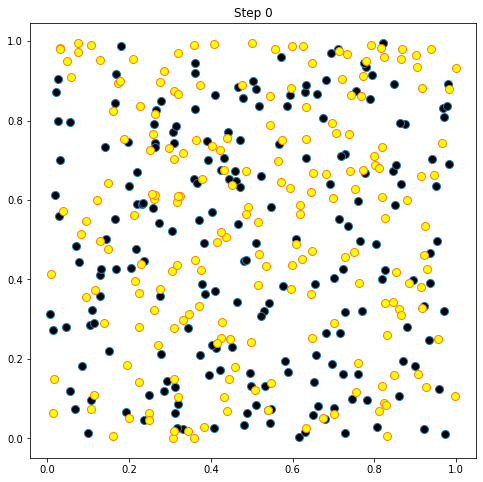

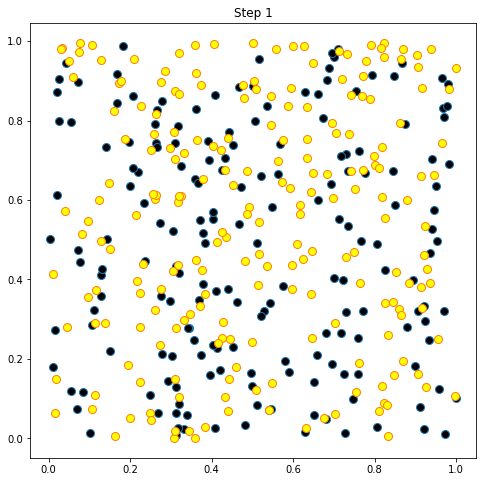

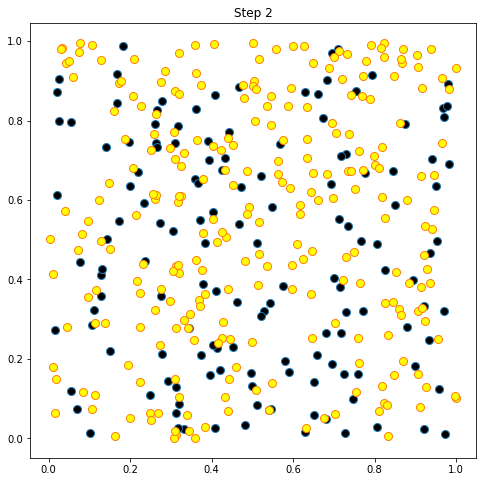


Среднее число перемещений: 3.3925 
Общее число итераций: 363

Предпочтения информированных агентов 
Politics: 29 
Economy: 52 
Sport: 38 
Art: 40 
Science: 40 
Education: 32 
Cooking: 30


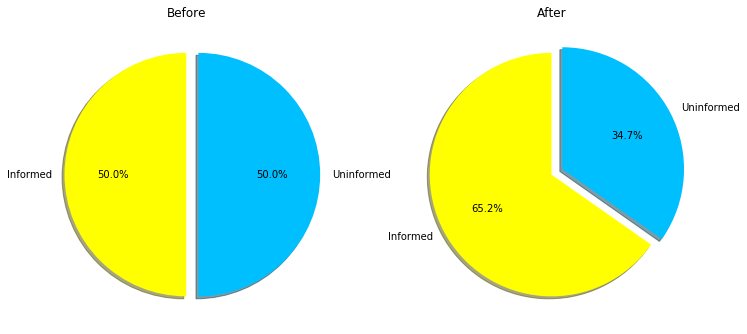

In [14]:
#количество агентов типа 0
number_of_type0 = widgets.IntText(
    value = 200,
    description="Informed")
display(number_of_type0)

#количество агентов типа 1
number_of_type1 = widgets.IntText(
    value = 200,
    description="Uninformed")
display(number_of_type1)

#количество соседей
local_neighbors = widgets.IntSlider(
    value=7,
    min=0,
    max=20,
    step=1,
    description='Neighbor',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(local_neighbors)

#reqires same time
require_same_type = widgets.IntSlider(
    value=5,
    min=0,
    max=10,
    step=1,
    description='Informed',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(require_same_type)

#процент толерантности
tolerance_p = widgets.FloatSlider(
    value=0.7,
    min=0,
    max=1.0,
    step=0.01,
    description='Tolerance',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
)
display(tolerance_p)

#use friendly

interact(f, x=widgets.Checkbox(description='Friendly',disabled=False))

#процент дружелюбности
friendly_p = widgets.FloatSlider(
    value=0,
    min=0,
    max=1.0,
    step=0.01,
    description='Friendly',
    disabled=True,
    continuous_update=False,
    orientation='horizontal',
)
display(friendly_p)

button = widgets.Button(description="Simulate", button_style='info')
output = widgets.Output()

display(button, output)

def on_button_clicked(a):
    function()

button.on_click(on_button_clicked)